# Projeto - Análise de Risco de Crédito

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
data_path = r"C:\Users\Usuario\OneDrive\Documentos\Projetos Visual Studio Code\DSNP 3.0\Datasets\acquisition_train.csv"

cred_risk_df = pd.read_csv(data_path)

cred_risk_df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [168]:
print('Dimensões do conjunto\n',
      f'\nEntradas: {cred_risk_df.shape[0]}',
      f'\nVariáveis: {cred_risk_df.shape[1]}')

print('\nNomes das colunas:')
cred_risk_df.columns

Dimensões do conjunto
 
Entradas: 45000 
Variáveis: 43

Nomes das colunas:


Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

### Dicionário de Variáveis

Observando os nomes de colunas e as primeiras entradas, podemos inferir algumas coisas. Além disso, se analisarmos cada variável em seus valores únicos, podemos deduzir o signficado, além de já identificar problemas nos dados:

- `ids`: identificadores dos clientes, aparentemente são _strings_ aleatórias que não serão úteis para a análise;
- `score_1, score_2`: variáveis de pontuação codificadas;
- `score_3, score_4, score_5, score_6`: variáveis numéricas que dizem respeito a pontuação do cliente. Pode ser útil para identificar inadimplentes;
- `risk_rate`: taxa de risco (de inadimplência?) do cliente (valores entre 0 e 1);
- `last_amount_borrowed`: registro do valor do último empréstimo do cliente;
- `last_borrowed_in_months`: número de meses desde o último empréstimo (36., nan, 60.);
- `credit_limit`: limite de crédito para determinado cliente;
- `income`: renda anual do cliente;
- `state, zip, channel, job_name, real_state`: dados demográficos, trabalho dos clientes (codificadas);
- `n_bankruptcies`: número de falências registradas do cliente ( 0.,  1., nan,  2.,  3.,  4.,  5.);
- `n_defaulted_loans`: número de calotes nos empréstimos (0., 1., nan, 2., 3., 5.);
- `n_accounts`: número de contas (valor inteiro);
- `n_issues`: número de problemas (valor inteiro);
- `application_time_applied`: tempo de aplicação (dados em horas, não está claro a que se refere);
- `email`: provedor de e-mail (outlook, gmail, etc);
- `external_data_provider_credit_checks_last_2_year`: coluna com 0 ou nan. Checagem de crédito nos últimos dois anos;
- `external_data_provider_credit_checks_last_year`, `external_data_provider_credit_checks_last_month`: Checagem de crédito no último ano (0., nan, 1.) e último mês (2, 1, 3, 0);
- `external_data_provider_email_seen_before`: E-mail visto antes (possui valores nan e discrepantes, como -999)
- `external_data_provider_first_name`: Primeiro nome do cliente;
- `external_data_provider_fraud_score`: Pontuação de fraude (não faz parte do escopo da nossa análise);
- `lat_lon`: tupla de valores de latitude e longitude;
- `marketing_channel`: canal de marketing (convite e-mail, radio, lista de espera, website, etc);
- `profile_phone_number`: número de telefone do cliente;
- `reported_income`: renda informada pelo cliente (float, mas poderia ser int);
- `shipping_state`, `shipping_zip_code`: estado de residência do cliente (BR-MG, BR-SP, etc) e CEP (int);
- `profile_tags`: lista com dicionários contendo tags de identificação (?) dos clientes ("{'tags': ['n19', 'n8']}", "{'tags': ['n6', 'n7', 'nim']}"). PS: dicionários formatados como string.
- `user_agent`: informações sobre pontos de acesso;
- `target_fraud`: variável que classifica uma transação fraudulenta ou não (fora do escopo do projeto);
- `target_default`: variável que classifica um cliente inadimplente ou não (**alvo**) (False, True, nan).

A análise dos valores únicos por coluna ajudou a identificar as colunas que já apresentavam problemas de valores discrepantes e ausentes, além daquelas cujos valores estão codificados. Como é uma análise feita manualmente, as células foram apagadas para não bagunçar o projeto.




### Informações da variável-alvo

Como visto, a variável `target_default` é o nosso alvo, contendo informações dos clientes regulares e inadimplentes. Vamos verificar algumas informações sobre ela, como valores únicos, proporções das classes e quantidade de valores nulos.

In [169]:
print('Valores na variável-alvo:')
cred_risk_df['target_default'].unique().tolist()

Valores na variável-alvo:


[False, True, nan]

In [170]:
print('Distribuição das classes:\n')

class_count = cred_risk_df['target_default'].value_counts()

print(class_count)

print('\nProporção no conjunto: \n')

class_0 = (class_count[0] * 100/ cred_risk_df.__len__()).round(2)
class_1 = (class_count[1] * 100/ cred_risk_df.__len__()).round(2)

print(f'False: \t{class_0} %',
      f'\nTrue: \t{class_1} %')

Distribuição das classes:

False    35080
True      6661
Name: target_default, dtype: int64

Proporção no conjunto: 

False: 	77.96 % 
True: 	14.8 %


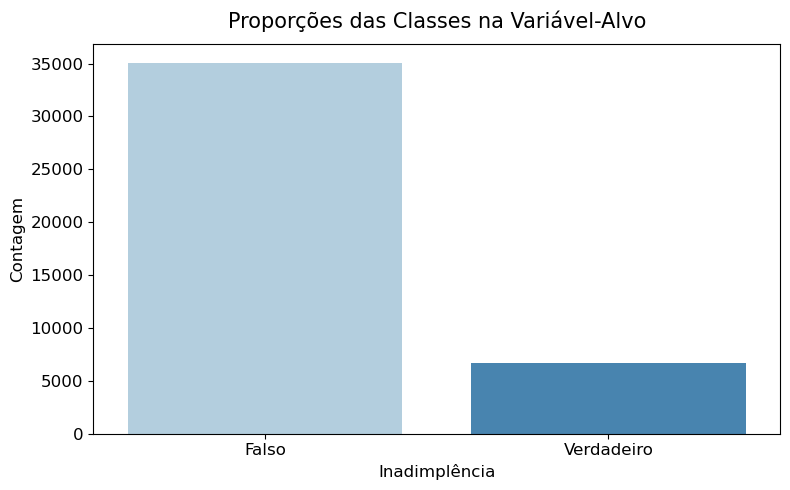

In [171]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.countplot(data = cred_risk_df, x = 'target_default', palette = 'Blues', ax = ax)

ax.set_title('Proporções das Classes na Variável-Alvo', fontsize = 15, pad = 12)
ax.set_ylabel('Contagem', fontsize = 12)
ax.set_xlabel('Inadimplência', fontsize = 12)
ax.set_xticklabels(['Falso', 'Verdadeiro'], fontdict = {'fontsize': 12})
ax.set_yticks(ticks = np.arange(0, 4e4, 5e3), 
              labels = [i for i in range(0, 40000, 5000)], 
              fontdict = {'fontsize': 12})

fig.tight_layout()

In [172]:
print('Quantidade de valores nulos no alvo: {}'.format(cred_risk_df['target_default'].isna().sum()))

Quantidade de valores nulos no alvo: 3259


Como podemos ver, nossa variável-alvo apresenta valores de verdadeiro, falso e valores ausentes que precisam ser tratados. Trata-se então de uma tarefa de classificação binária, com as seguintes classes:

- **True**: Clientes inadimplentes;
- **False**: Clientes regulares.

Iremos posteriormente codificar esses valores, de modo que a classe True seja mapeada com o valor 1 e classe False seja mapeada com o valor 0.

### Informações do conjunto de dados

Agora que vimos informações sobre a variável-alvo, vamos seguir com a análise para outras variáveis do conjunto. Começaremos analisando a quantidade de valores ausentes, as colunas que serão removidas, e aquelas que serão imputadas com novos valores para preencher os ausentes.

In [173]:
print('Resumo de informações do conjunto, tipos e valores ausentes:\n')
cred_risk_df.info(verbose = True)

Resumo de informações do conjunto, tipos e valores ausentes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                         

### Tratamento de valores ausentes

In [174]:
print('Valores ausentes por coluna, ordenados de forma decrescente (%):')
round((cred_risk_df.isna().sum()) * 100 / cred_risk_df.__len__(), 1).sort_values(ascending = False)

Valores ausentes por coluna, ordenados de forma decrescente (%):


target_fraud                                        96.6
last_amount_borrowed                                66.6
last_borrowed_in_months                             66.6
ok_since                                            59.0
external_data_provider_credit_checks_last_2_year    50.3
external_data_provider_credit_checks_last_year      33.6
credit_limit                                        30.7
n_issues                                            25.7
facebook_profile                                     9.9
marketing_channel                                    8.0
job_name                                             7.4
target_default                                       7.2
external_data_provider_email_seen_before             5.0
lat_lon                                              3.0
user_agent                                           1.6
n_bankruptcies                                       1.5
reason                                               1.3
n_defaulted_loans              

Variáveis sem nenhum valor ausente:

- `profile_tags`
- `shipping_zip_code`
- `shipping_state`
- `reported_income`
- `profile_phone_number`
- `external_data_provider_credit_checks_last_month`
- `external_data_provider_fraud_score`
- `external_data_provider_first_name`
- `score_4`
- `score_5`
- `score_6`
- `email`
- `application_time_in_funnel`
- `application_time_applied`
- `ids`                  

Dentre as variáveis que possuem valores ausentes, algumas não possuem nenhum significado para nossa análise e serão removidas.  Particularmente, as variáveis que dizem respeito à tarefa de detecção de fraudes, que não faz parte do escopo desse projeto, serão removidas. São elas: `target_fraud` e `external_data_provider_fraud_score`. Outras variáveis simplesmente não possuem nenhum poder preditivo para análise (e.g nome ou e-mail que a pessoa usa, perfil do Facebook) ou são de difícil interpretabilidade (e.g pontos de acesso, horários, etc), como `ids`, `email`, `external_data_provider_first_name`, `profile_phone_number`, `facebook_profile`, `user_agent`, `application_time_applied`, `external_data_provider_credit_checks_last_year`, `external_data_provider_credit_checks_last_2_year`, `reason`, etc.

Dentre as variáveis codificadas, temos: `state, zip, channel, job_name, real_state, score_1 e score_2`. Para verificar se compensa ou não removê-las, podemos investigar as correlações que essas variáveis tem com o alvo. Se forem correlações significativas, podemos mantê-las no conjunto de dados. Para analisar as correlações, essas variáveis precisam ser numéricas. Assim irei utilizar da técnica de One-Hot Enconding naquelas que possuem poucos valores únicos, para transformar as categorias em novas colunas. Primeiro vamos verificar os valores únicos dessas colunas:

In [175]:
cred_risk_df[['state', 'zip', 'channel', 'job_name', 'real_state', 'score_1', 'score_2']].nunique().sort_values()

channel           1
real_state        5
score_1           7
score_2          35
state            50
zip             823
job_name      32265
dtype: int64

Apenas as variáveis `score_1` e `real_state` possuem poucos valores únicos. A variável `channel`, assim como `external_data_provider_credit_checks_last_2_year`, possui apenas um valor que por si só não oferece nenhum poder preditivo. Iremos removê-las posteriormente.

Poderíamos argumentar que o fato do cliente ser inadimplente pode ter a ver com seu emprego. Vamos analisar se existe algum tipo de emprego, na coluna `job_name`, que indique essa relação. 

In [176]:
count_jobs = cred_risk_df.loc[cred_risk_df['target_default'] == True]['job_name'].value_counts()

print(count_jobs[:10], '\n') 

print('Sumário Estatístico')

print(count_jobs.describe(percentiles = [.5, .75, .95, .99, .999]).round(1))

print(f'\nSoma das frequências de casos inadimplentes para empregos no percentil maior que 75%: {count_jobs.loc[count_jobs > 1].sum()}')

mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaUIfpgwbYh438CvSsT5QB8=    19
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIbOy82w5K5LALfp4MHskDUE=    17
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIVf4E/iI7qK+Lfl5hxoWW2A=    16
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSISzmgfFzT+qYrtqTHkJFqpA=    12
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIUGp9a+9oBSLvyI5Jdz9fNg=    12
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIb4ADj/ykkhgM886TEQ8yrI=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIh/cdCiaVzVo/KVM2JldD+WiCpSDcTmA605zSPwbuinf0=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIV56G3kjZxQ0yMeb3IU2UKE=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1F

Os resultados aqui são interessantes. Os 5 primeiros itens da lista representam títulos de empregos que mais se repetem quando o cliente é inadimplente. Podemos ter a situação de que sejam apenas títulos mais comuns de empregos contra títulos mais raros, e.g comerciante vs piloto de avião, e por isso eles aparecem mais vezes na lista de clientes inadimplentes. 

Ao analisarmos o sumário estatístico, vemos que 99% dos empregos que aparecem na lista de inadimplentes o fazem até 4 vezes, significando que existe 1% de empregos que sempre que aparecem aumentam as chances do cliente ser previsto como inadimplente. Isto corresponde a 55 empregos. Acima disso, apenas 6 aparecem na lista de inadimplentes com uma frequência maior do que 11.

Se olharmos a proporçao da classe de inadimplentes do problema, ela representa 14,8% do conjunto (ou 6661 exemplos). Dos empregos que aparecem mais de uma vez na lista de inadimplentes, a soma das frequências não chega a 900. Isso mostra que, apesar de terem um potencial preditivo interessante, não constituem uma correlação tão forte, pois a maioria dos exemplos de inadimplentes não são previstos pelos top 25% de empregos mais frequentes na lista de inadimplentes.

Por causa disto, e da falta de interpretabilidade da variável, por ela estar codificada, ela será removida da análise nesse momento.



Vamos analisar mais algumas variáveis, visando conhecer suas distribuições estatísticas e valores únicos. Assim, poderemos escolher quais iremos manter, quais remover e quais imputar valores.

### Análise Exploratória

#### Construção de funções para análise:

- **Informações das variáveis**

In [177]:
def variable_info(variable: str):
    isna_proportion = (cred_risk_df.isna().sum() * 100 / cred_risk_df.__len__()).sort_values(ascending = False).round(1)

    print(f'Variável {variable}\n')

    print(f'Proporção de valores ausentes: {isna_proportion[variable]}%\n')
    
    if cred_risk_df[variable].dtypes == 'O':
      
      print(f'Sumário Estatístico {variable}:\n')
      print(cred_risk_df[variable].describe())

      print(f'\nValores únicos:',
            f'\n{cred_risk_df[variable].unique()}',
            f'\n\nQuantidade de valores únicos: {cred_risk_df[variable].nunique()}')
                  
    else:
      
      print(f'Sumário Estatístico {variable}:\n')
      print(cred_risk_df[variable].describe().round(1))
      
      print(f'\nValores únicos:',
            f'\n{cred_risk_df[variable].unique()}',
            f'\n\nQuantidade de valores únicos: {cred_risk_df[variable].nunique()}')
            
      print('\nTipo da variável: ', cred_risk_df[variable].dtypes)

- **Plotar Boxplot**

In [178]:
def plot_boxplot(variable: str):
    fig, ax = plt.subplots(figsize = (12, 4))
    
    sns.boxplot(data = cred_risk_df, 
                x = variable, 
                ax = ax, 
                palette = 'Blues', 
                showmeans = True)

    ax.set_title(f'Boxplot {variable}', fontsize = 14)
    ax.set_xlabel(f'{variable}', fontsize = 12)

    fig.tight_layout()

- **Lidar com Outliers com método IQR**

In [179]:
def iqr_outlier_removal(variable: str):

    percentile_75 = cred_risk_df[variable].quantile(.75)
    percentile_25 = cred_risk_df[variable].quantile(.25)

    iqr = percentile_75 - percentile_25

    iqr_upper = percentile_75 + 3 * iqr
    iqr_lower = percentile_25 - 3 * iqr

    idx = cred_risk_df.loc[cred_risk_df[variable] > iqr_upper].index
    cred_risk_df.drop(idx, axis = 0, inplace = True)

    print(f'{len(idx)} outliers removidos.')

#### ok_since

In [180]:
variable_info('ok_since')

Variável ok_since

Proporção de valores ausentes: 59.0%

Sumário Estatístico ok_since:

count    18455.0
mean        35.1
std         21.7
min          0.0
25%         17.0
50%         32.0
75%         50.0
max        141.0
Name: ok_since, dtype: float64

Valores únicos: 
[ nan  50.  41.  11.  35.  16.  19.  23.  43.  17.  29.  18.   8.  56.
  38.  93.  27.  44.  13.  66.  33.  68.  12.  30.  24.  21.   7.  63.
  51.  31.  73.  49.   4.  75.  48.  14.  76.  36.   5.  46.  34.  59.
  61.  55.  84.  28.   6.  67.  39.  52.  72.  10.  45.  32.  62.   0.
  58.  15.  78.  70.   9.  22.  80.  20.  37.   3.  53.  60.  74.  26.
  47.   1.  42.  57.  40.  54.  65.  81.  69.  25.  77.  71.  64.  86.
  79.  82.   2.  83.  85. 103. 135.  97. 101.  90. 130. 141. 108.  88.
  95. 122.  87.] 

Quantidade de valores únicos: 100

Tipo da variável:  float64


Essa variável apresenta muitos valores ausentes. Porém, seu sumário estatístico não apresenta valores discrepantes e possui muitos valores distintos. Vamos mantê-la preenchendo os valores ausentes por sua mediana e testar no modelo.

Pode ser convertida para tipo _int_.

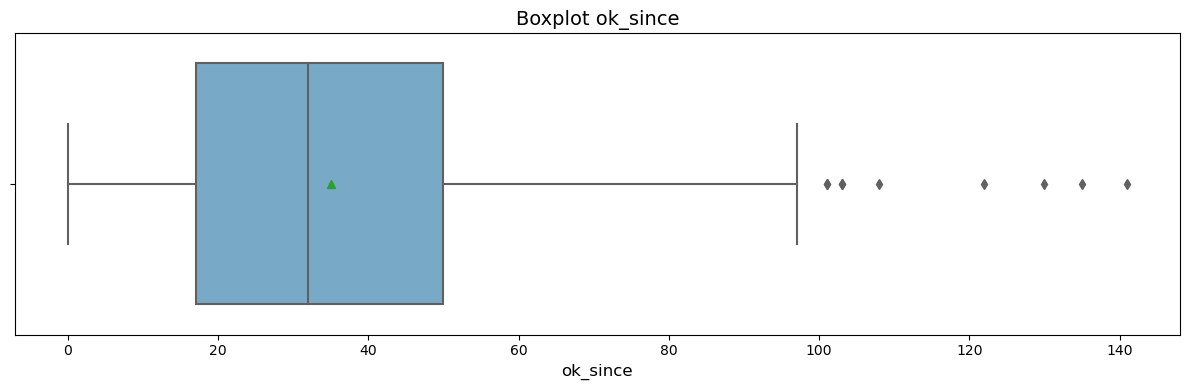

In [181]:
plot_boxplot('ok_since')

#### last_amount_borrowed

In [182]:
variable_info('last_amount_borrowed')

Variável last_amount_borrowed

Proporção de valores ausentes: 66.6%

Sumário Estatístico last_amount_borrowed:

count    15044.0
mean     13782.3
std       8077.6
min       1005.2
25%       7519.5
50%      12023.5
75%      19220.3
max      35059.6
Name: last_amount_borrowed, dtype: float64

Valores únicos: 
[25033.92      nan  7207.92 ...  5022.86 14766.42  4226.74] 

Quantidade de valores únicos: 14325

Tipo da variável:  float64


Apesar da grande proporção de valores ausentes, iremos preencher os valores ausentes por zeros, uma vez que o sumário estatístico é bom e devido a o fato de existir muitos valores distintos. Outro motivo seria porque a variável é relacionada com os valores dos empréstimos realizados pelos clientes. Iremos mantê-la e ver a performance no modelo. 

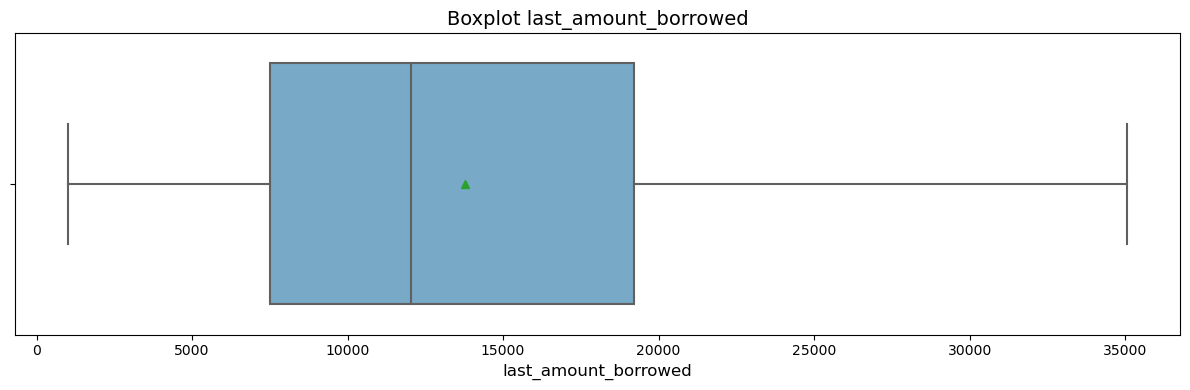

In [183]:
plot_boxplot('last_amount_borrowed')

#### last_borrowed_in_months

In [184]:
variable_info('last_borrowed_in_months')

Variável last_borrowed_in_months

Proporção de valores ausentes: 66.6%

Sumário Estatístico last_borrowed_in_months:

count    15044.0
mean        41.8
std         10.3
min         36.0
25%         36.0
50%         36.0
75%         36.0
max         60.0
Name: last_borrowed_in_months, dtype: float64

Valores únicos: 
[36. nan 60.] 

Quantidade de valores únicos: 2

Tipo da variável:  float64


#### credit_limit

In [185]:
variable_info('credit_limit')

Variável credit_limit

Proporção de valores ausentes: 30.7%

Sumário Estatístico credit_limit:

count     31200.0
mean      34382.0
std       36587.0
min           0.0
25%       10000.0
50%       25647.0
75%       47086.8
max      448269.0
Name: credit_limit, dtype: float64

Valores únicos: 
[    0. 39726.    nan ... 10431. 36262. 17942.] 

Quantidade de valores únicos: 20928

Tipo da variável:  float64


Essa variável já possui uma menor proporção de valores ausentes, tornando possível imputar os valores a partir das informações do sumário estatístico, especificamente a mediana. Iremos fazer esse tratamento nas etapas posteriores. Outra coisa é o tipo da variável, que pode ser convertido para _int_.

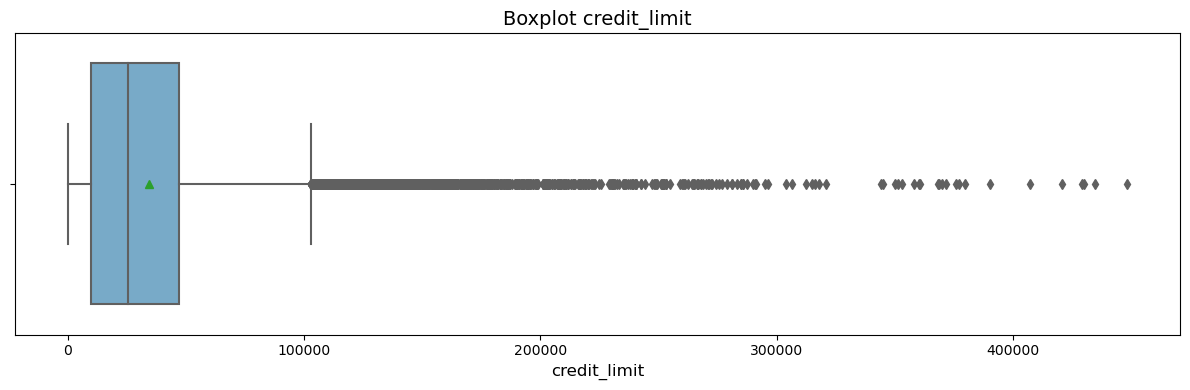

In [186]:
plot_boxplot('credit_limit')

In [187]:
iqr_outlier_removal('credit_limit')

417 outliers removidos.


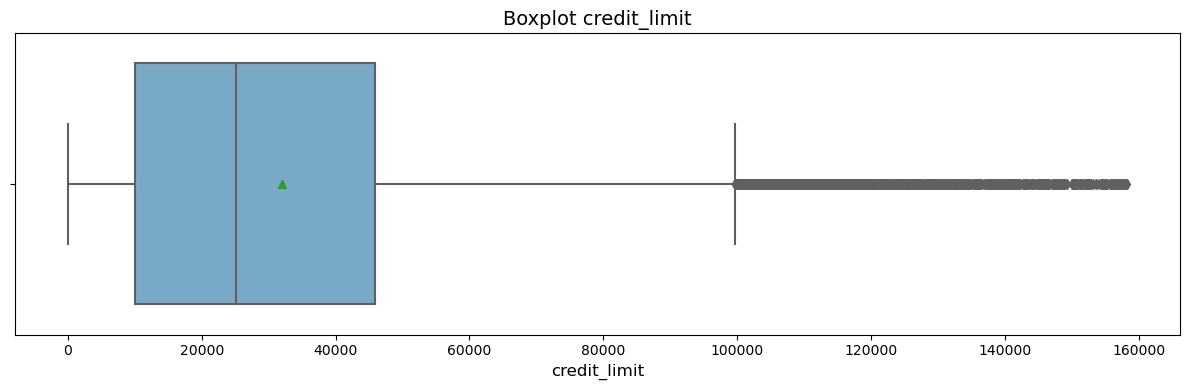

In [188]:
plot_boxplot('credit_limit')

#### n_issues

In [189]:
variable_info('n_issues')

Variável n_issues

Proporção de valores ausentes: 25.9%

Sumário Estatístico n_issues:

count    33039.0
mean        11.0
std          4.5
min          0.0
25%          8.0
50%         10.0
75%         14.0
max         49.0
Name: n_issues, dtype: float64

Valores únicos: 
[18. 14. nan 19.  9.  7.  8. 16.  5. 13. 12. 23.  6. 22. 11. 15. 17. 21.
  4. 10.  3. 24. 20. 30. 25.  2. 27. 37. 26.  1. 29. 28. 40. 34. 49. 31.
 32. 39. 42. 36. 35.  0. 41. 38.] 

Quantidade de valores únicos: 43

Tipo da variável:  float64


Outra variável que iremos preencher os valores ausentes com a mediana, uma vez que a proporção de valores nulos é de 25,7%. Além disso, pode ser convertida para tipo _int_.

#### external_data_provider_email_seen_before

In [190]:
variable_info('external_data_provider_email_seen_before')

Variável external_data_provider_email_seen_before

Proporção de valores ausentes: 5.0%

Sumário Estatístico external_data_provider_email_seen_before:

count    42371.0
mean        12.5
std        126.8
min       -999.0
25%         11.0
50%         27.0
75%         43.0
max         59.0
Name: external_data_provider_email_seen_before, dtype: float64

Valores únicos: 
[  51.   17.    9.   38.   46.   21.   16.   37.    6.   nan   10.   29.
   59.   20.   54.   13.   52.    4.   31.   40.   -1. -999.   26.   48.
   50.    5.    3.   39.   11.    0.   58.   55.    2.    1.   53.   15.
   23.   24.   44.   14.   25.   34.   35.   12.   27.   49.    7.   36.
   47.   57.    8.   18.   43.   30.   42.   28.   41.   56.   32.   33.
   22.   19.   45.] 

Quantidade de valores únicos: 62

Tipo da variável:  float64


Essa variável apresenta dois valores discrepantes de -999 e -1. Esses valores não correspondem à realidade que a variável quer transmitir e, por isso, serão substituídos por zero.

In [191]:
# Identificar as entradas com valores estranhos
idx = cred_risk_df.loc[cred_risk_df['external_data_provider_email_seen_before'] == -999.].index
idx2 = cred_risk_df.loc[cred_risk_df['external_data_provider_email_seen_before'] == -1.].index
# Contar o número de entradas e somar numa variável
entries_1 = cred_risk_df.loc[cred_risk_df['external_data_provider_email_seen_before'] == -999.].shape[0]
entries_2 = cred_risk_df.loc[cred_risk_df['external_data_provider_email_seen_before'] == -1.].shape[0]
num_entries = entries_1 + entries_2

# Substituindo valores negativos por zero
if num_entries != 0:
    cred_risk_df['external_data_provider_email_seen_before'].replace({-1.: 0, -999.: 0}, inplace = True)

print('Valores Negativos substituídos com sucesso!\n')

print('Sumário estatístico da variável:')
print(cred_risk_df['external_data_provider_email_seen_before'].describe().round(1))

Valores Negativos substituídos com sucesso!

Sumário estatístico da variável:
count    42371.0
mean        27.6
std         18.1
min          0.0
25%         11.0
50%         27.0
75%         43.0
max         59.0
Name: external_data_provider_email_seen_before, dtype: float64


Agora temos um sumário estatístico correto. Iremos preencher os valores ausentes que restaram pelo valor da mediana, uma vez que eles correspondem a 5% das entradas do conjunto nessa variável.

#### n_bankruptcies

In [192]:
variable_info('n_bankruptcies')

Variável n_bankruptcies

Proporção de valores ausentes: 1.6%

Sumário Estatístico n_bankruptcies:

count    43886.0
mean         0.1
std          0.3
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          5.0
Name: n_bankruptcies, dtype: float64

Valores únicos: 
[ 0.  1. nan  2.  3.  4.  5.] 

Quantidade de valores únicos: 6

Tipo da variável:  float64


No caso dessa variável, iremos substituir os valores ausentes (que correspondem a 1,5 % das entradas) por zero. Além disso, ela pode ser convertida para o tipo _int_.

#### marketing_channel

In [193]:
variable_info('marketing_channel')

Variável marketing_channel

Proporção de valores ausentes: 8.0%

Sumário Estatístico marketing_channel:

count       41036
unique          9
top       Website
freq        10832
Name: marketing_channel, dtype: object

Valores únicos: 
['Invite-email' 'Radio-commercial' 'Waiting-list' 'Website' 'Twitter'
 'Facebook' nan 'Instagram' 'Invite-web' 'LinkedIn'] 

Quantidade de valores únicos: 9


Variáveis para imputar valores:

* external_data_provider_email_seen_before: mediana
* credit_limit: mediana
* n_issues: mediana
* marketing_channel: moda

#### n_defaulted_loans

In [195]:
variable_info('n_defaulted_loans')

Variável n_defaulted_loans

Proporção de valores ausentes: 1.3%

Sumário Estatístico n_defaulted_loans:

count    44009.0
mean         0.0
std          0.1
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          5.0
Name: n_defaulted_loans, dtype: float64

Valores únicos: 
[ 0.  1. nan  2.  3.  5.] 

Quantidade de valores únicos: 5

Tipo da variável:  float64


#### n_accounts

In [196]:
variable_info('n_accounts')

Variável n_accounts

Proporção de valores ausentes: 1.3%

Sumário Estatístico n_accounts:

count    44021.0
mean        10.6
std          4.5
min          0.0
25%          7.0
50%         10.0
75%         13.0
max         49.0
Name: n_accounts, dtype: float64

Valores únicos: 
[18. 14. 10. 19. 11.  9.  8.  7. 16.  6.  5. 13.  4. 12. 23. 22. 15. 17.
 21. 20.  3. nan 24. 28.  2. 30. 25. 27. 37. 26.  1. 29. 33. 35. 34. 40.
 49. 31. 32. 39. 42. 36.  0. 41. 38.] 

Quantidade de valores únicos: 44

Tipo da variável:  float64


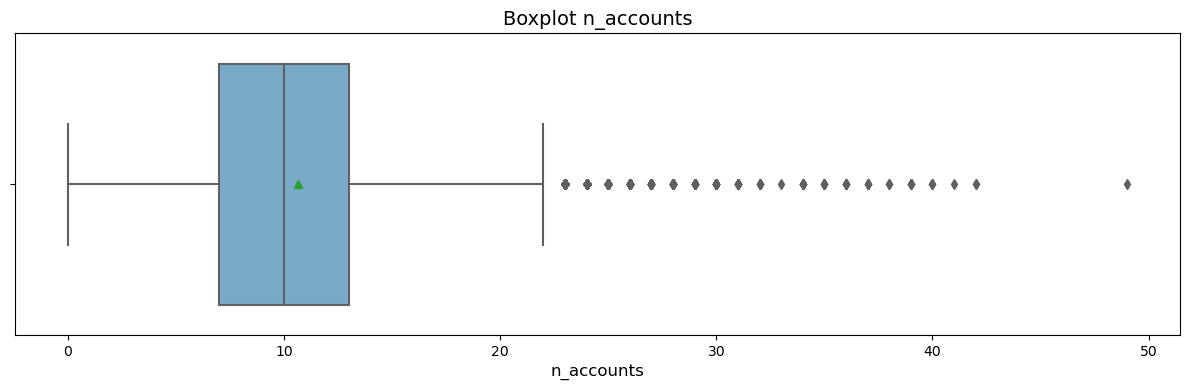

In [197]:
plot_boxplot('n_accounts')

#### risk_rate

In [198]:
variable_info('risk_rate')

Variável risk_rate

Proporção de valores ausentes: 1.3%

Sumário Estatístico risk_rate:

count    44021.0
mean         0.3
std          0.1
min          0.0
25%          0.2
50%          0.3
75%          0.4
max          0.9
Name: risk_rate, dtype: float64

Valores únicos: 
[0.4  0.24 0.29 0.32 0.18 0.44 0.43 0.33 0.36 0.22 0.12 0.27 0.38 0.25
 0.13 0.15 0.19 0.23 0.28 0.42 0.34 0.21 0.35 0.41 0.26 0.49 0.31 0.3
 0.51 0.08 0.17 0.2  0.09 0.45 0.46 0.37 0.16 0.39 0.11 0.54  nan 0.48
 0.04 0.59 0.07 0.53 0.5  0.58 0.47 0.1  0.14 0.05 0.52 0.72 0.55 0.56
 0.06 0.57 0.61 0.7  0.6  0.62 0.65 0.63 0.8  0.78 0.77 0.66 0.03 0.64
 0.73 0.75 0.67 0.68 0.69 0.74 0.   0.71 0.9  0.84 0.76 0.02 0.81] 

Quantidade de valores únicos: 82

Tipo da variável:  float64


#### income

In [199]:
variable_info('income')

Variável income

Proporção de valores ausentes: 1.3%

Sumário Estatístico income:

count      44021.0
mean       70946.6
std        50171.5
min         4821.2
25%        44864.1
50%        61010.3
75%        85033.2
max      5000027.8
Name: income, dtype: float64

Valores únicos: 
[ 65014.12 100018.91  65023.65 ... 106020.9  185018.07  34013.65] 

Quantidade de valores únicos: 40831

Tipo da variável:  float64


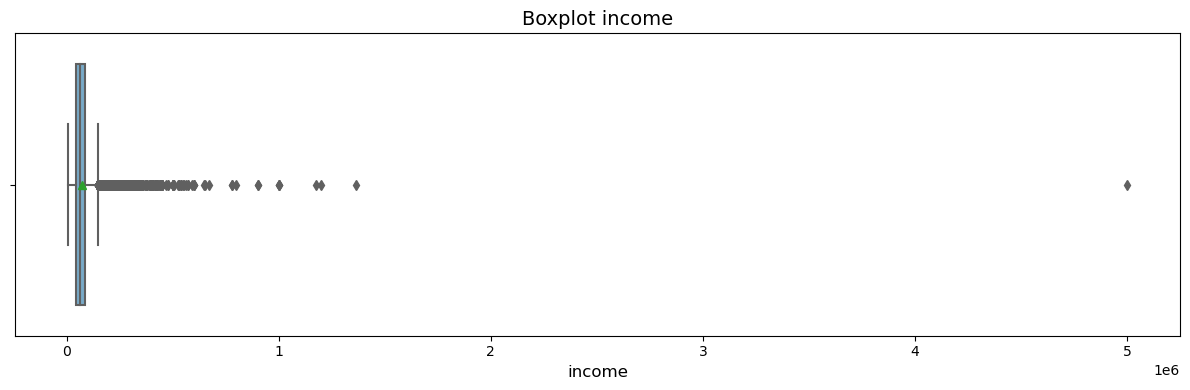

In [200]:
plot_boxplot('income')

In [201]:
iqr_outlier_removal('income')

546 outliers removidos.


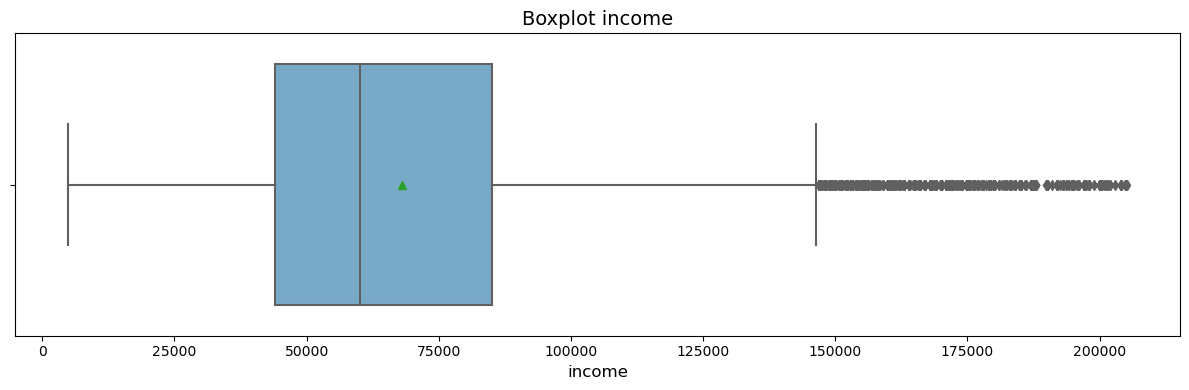

In [202]:
plot_boxplot('income')

#### reported_income

In [203]:
variable_info('reported_income')

Variável reported_income

Proporção de valores ausentes: 0.0%

Sumário Estatístico reported_income:

count     44037.0
mean          inf
std           NaN
min         403.0
25%       51100.0
50%      102010.0
75%      151384.0
max           inf
Name: reported_income, dtype: float64

Valores únicos: 
[ 57849.   4902. 163679. ...  73417.  26246. 112766.] 

Quantidade de valores únicos: 39243

Tipo da variável:  float64


#### Critérios para remoção de variáveis:

* Baixo poder preditivo (e.g `facebook_profile`, `profile_phone_number`);
* Baixa interpretabilidade devido a codificação (`state`, `job_name`);
* Dificíl formatação dos dados que dificulta a interpretação (e.g `user_agent`, `profile_tags`);
* Possuir apenas um valor único (e.g `channel`).


In [ ]:
df_clean = cred_risk_df.copy()

cols_to_drop = ['target_fraud', 'external_data_provider_fraud_score',
                'ids', 'email', 'external_data_provider_first_name',
                'profile_phone_number', 'profile_tags', 'facebook_profile',
                'user_agent', 'state', 'zip', 'job_name', 'channel',
                'application_time_applied', 
                'external_data_provider_credit_checks_last_year',
                'external_data_provider_credit_checks_last_2_year']

for col in cols_to_drop:
    if col in df_clean.columns.tolist():
        
        df_clean.drop(col, axis = 1, inplace = True)

print('Nova Dimensão do Conjunto')
print(f'\nEntradas: {df_clean.shape[0]}',
      f'\nVariáveis: {df_clean.shape[1]}')

In [ ]:
cred_risk_df['n_issues']